In [11]:
from typing import List, Dict
from unidecode import unidecode
import matplotlib.pyplot as plt
schema = {}
vyskyty_rymu = {'Sdružený': 0, 'Střídavý': 0, 'Obkročný': 0, 'Přerývaný': 0}

In [12]:
nazev_souboru = input('Zadej název souboru s básní: ')
def nacti_basnicku(nazev_souboru: str) -> List[str]:
    """Funkce načte obsah souboru s básničkou a vrátí pole řádků."""
    with open(nazev_souboru) as soubor:
        radky = soubor.readlines()
    return radky

print(nacti_basnicku(nazev_souboru))

['Jak lvové bijem o mříže,\n', 'jak lvové v kleci jatí,\n', 'my bychom vzhůru k nebesům\n', 'a jsme zde Zemí spjatí.\n', '\n', 'Nám zdá se, z hvězd že vane hlas:\n', '"Nuž pojďte, páni, blíže,\n', 'jen trochu blíže, hrdobci*,\n', 'jimž hrouda nohy víže!"\n', '\n', 'My přijdem! Odpusť, matičko,\n', 'již jsi nám, Země, malá,\n', 'my blesk k myšlénkám spřaháme\n', 'a noha parou cvalá.\n', '\n', 'My přijdem! Duch náš roste v výš\n', 'a tepny touhou bijí,\n', 'zimniční touhou po světech\n', 'div srdce nerozbijí!\n', '\n', 'My přijdem blíž, my přijdem blíž,\n', 'my světů dožijeme,\n', 'my bijem o mříž, ducha lvi,\n', 'a my ji rozbijeme!']


In [13]:
def zpracuj_basnicku(radky: List[str]) -> List[str]:
    """Funkce zpracuje pole řádků básně a vrátí pole posledních znaků každého řádku."""
    posledni_pismena = []
    for radek in radky:
        radek = radek.strip()
        if radek:
            for spatne_znaky in [".", ",", "!", ":", "-", "?", "“", "—", "*", " ", "–", ";", '"']:
                radek = radek.replace(spatne_znaky, "")
            radek = radek.replace('i', 'y').replace('í', 'ý').replace('I', 'Y').replace('Í', 'Ý')
            posledni_znaky = unidecode(radek[-2:]) if unidecode(radek[-1]) != '\n' else unidecode(radek[-3:-1])
            posledni_pismena.append(posledni_znaky)
    return posledni_pismena

radky = nacti_basnicku(nazev_souboru)
pole_znaku = zpracuj_basnicku(radky)
print(pole_znaku)

['ze', 'ty', 'um', 'ty', 'as', 'ze', 'cy', 'ze', 'ko', 'la', 'me', 'la', 'ys', 'jy', 'ch', 'jy', 'yz', 'me', 'vy', 'me']


In [14]:
def zjisti_schema(pole_znaku: List[str]) -> Dict[str, int]:
    """Funkce zjistí schéma rýmů na základě pole posledních znaků a následně určí druhy rýmů a vrátí slovník s výskytem rýmů."""
    for j in range(0, len(pole_znaku), 4):
            if pole_znaku[j+1] != pole_znaku[j]:
                schema[pole_znaku[j]] = 'A'
                schema[pole_znaku[j+1]] = 'B'
            else:
                schema[pole_znaku[j]] = 'A'
                schema[pole_znaku[j+1]] = 'A'

            if [pole_znaku[j]] != [pole_znaku[j+1]]:        

                if pole_znaku[j+2] == pole_znaku[j]:
                    schema[pole_znaku[j+2]] ='A'
                elif pole_znaku[j+2] == pole_znaku[j+1]:
                    schema[pole_znaku[j+2]] = 'B'
                else:
                    schema[pole_znaku[j+2]] = 'C'

                if pole_znaku[j+3] == pole_znaku[j]:
                    schema[pole_znaku[j+3]] = 'A'
                elif pole_znaku[j+3] == pole_znaku[j+1]:
                    schema[pole_znaku[j+3]] = 'B'
                else:
                    schema[pole_znaku[j+3]] = 'C'   
            else:                              
                schema[pole_znaku[j+2]] = 'B'        
                schema[pole_znaku[j+3]] = 'B'                
            
            if schema[pole_znaku[j]] == 'A' and schema[pole_znaku[j+1]] == 'A' and schema[pole_znaku[j+2]] == 'B' and schema[pole_znaku[j+3]] == 'B':
                print('Tento rým je sdružený.\n') 
                vyskyty_rymu['Sdružený'] += 1
            elif schema[pole_znaku[j]] == 'A' and schema[pole_znaku[j+1]] == 'B' and schema[pole_znaku[j+2]] == 'A' and schema[pole_znaku[j+3]] == 'B':
                print('Tento rým je střídavý.\n')
                vyskyty_rymu['Střídavý'] += 1 
            elif schema[pole_znaku[j]] == 'A' and schema[pole_znaku[j+1]] == 'B' and schema[pole_znaku[j+2]] == 'B' and schema[pole_znaku[j+3]] == 'A':
                print('Tento rým je obkročný.\n')
                vyskyty_rymu['Obkročný'] += 1 
            elif schema[pole_znaku[j]] == 'A' and schema[pole_znaku[j+1]] == 'B' and schema[pole_znaku[j+2]] == 'C' and schema[pole_znaku[j+3]] == 'B':
                print('Tento rým je přerývaný.\n')  
                vyskyty_rymu['Přerývaný'] += 1 
            else: print('Tento druh rýmu neumím určit.\n')
    return vyskyty_rymu
vypis_schema = zjisti_schema(pole_znaku)
print(vyskyty_rymu)

Tento rým je přerývaný.

Tento rým je přerývaný.

Tento rým je přerývaný.

Tento rým je přerývaný.

Tento rým je přerývaný.

{'Sdružený': 0, 'Střídavý': 0, 'Obkročný': 0, 'Přerývaný': 5}


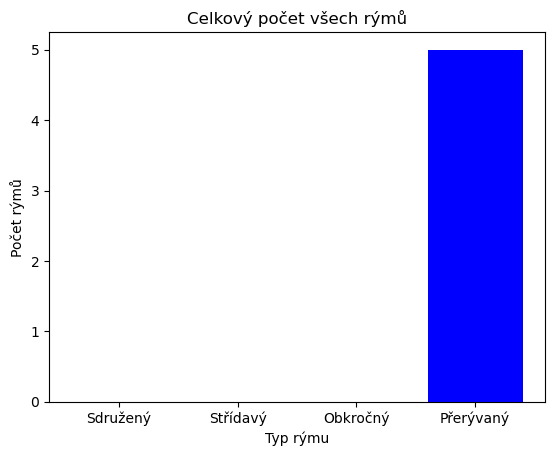

In [15]:
def graf_rymu(vyskyty_rymu: Dict[str,int] ) -> None:
    """Funkce zobrazí sloupcový graf s počtem jednotlivých rýmů.""" 
    rymy = list(vyskyty_rymu.keys())
    pocet_vyskytu = list(vyskyty_rymu.values())
    plt.bar(rymy, pocet_vyskytu, color='blue')
    plt.title('Celkový počet všech rýmů')
    plt.xlabel('Typ rýmu')
    plt.ylabel('Počet rýmů')
    plt.show()

graf_rymu(vyskyty_rymu)